In [1]:
#AutoCompletar funciones.
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
#Descargo el archivo unificado de la fase anterior (2.3) 
fichero = "https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"
df =  pd.read_csv(fichero,encoding="UTF-8")
df['FECHAH'] = pd.to_datetime(df['FECHAH'])
#df.dtypes
### Random Forest para NO2

## Random Forest aislando el contaminante
Prueba, si excluyendo el resto de contaminantes y quedandonos solo con el NO2 cual es la capacidad del algoritmo de predecir su comportamiento. 

In [19]:
df2 = df.iloc[:,9:]
#Añadimos a df2 la columna correspondiente a NO2
df2["NO2"] = df["NO2"]
df2['ES10'] = df2['ES10'].shift(1)
df2['ES53'] = df2['ES53'].shift(1)
#Eliminamos las filas que contengan valores nulos y guardamos en df3
df3 = df2.dropna()

#asignamos a la y la columna de NO2 el resto a la x 
y = df3.NO2
X = df3.iloc[:,:-1]

regr = RandomForestRegressor(max_depth=70, n_estimators =100, random_state=0)

#Dividimos el model de entrenamiento y test 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
modelo = regr.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

#Calculamos el RMSE y MAE (rmse El error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("Rmse:",rmse,"MAE:",mae)

Rmse: 15.641652015373403 MAE: 10.842547735191637


In [20]:
len(X),len(X_train),len(X_test)

(21742, 14567, 7175)

In [21]:
y_pred = modelo.predict(X_test)
ys = list(zip(list(y_test),list(y_pred)))

##### Representacion grafica de Random Forest
Se puede apreciar en la grafica que si se añaden el resto de contaminantes, excluyendo el NO y NOx puede predecir de forma eficiente el comportamiento de la contaminación

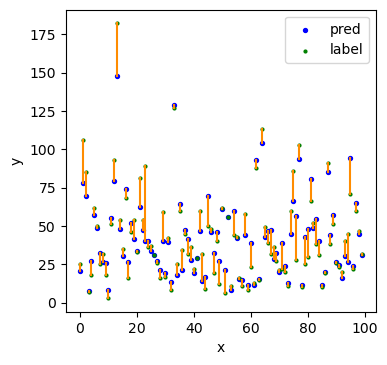

In [22]:
cuantos = 100
ypred = y_pred[:cuantos]
ylabel = list(y_test)[:cuantos]
x = list(range(len(ylabel)))
plt.rcParams["font.size"] = 10
figure, ax = plt.subplots(1,figsize=(4, 4),dpi=100)    
for i in range(len(x)):
    plt.plot([x[i],x[i]],[ypred[i],ylabel[i]],color="darkorange")

plt.scatter(x,ypred, color='blue', label="pred",s=8)
plt.scatter(x,ylabel, color='green', label="label",s=4)


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Random Forest con el resto de contaminantes
Predicción incluyendo el resto de contaminantes quitando el NOx y NO.

In [23]:
#filtramos en df2 todas las variables independientes a contaminantes)
df2 = df
#Quitamos los contaminantes que tienen una correlacion alta y derivan del mismo
#Como los NOx o NO además de la fechah, tipo y la suma de estaciones. 
df2 = df2.drop(['NO', 'NOx', 'FECHAH', 'TIPO', 'ESSUMA'], axis=1)
df2['ES10'] = df2['ES10'].shift(1)
df2['ES53'] = df2['ES53'].shift(1)
first_colum = df2.pop('NO2')
df2.insert(0, 'NO2', first_colum)
df2

,NO2,CO,PM2.5,PM10,O3,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53
0,73.0,0.6,NaN,NaN,3.08,0.68,48.0,2.6,71.0,959.0,0.0,NaN,NaN
1,82.0,0.8,NaN,NaN,3.05,0.69,32.0,2.5,71.0,959.0,0.0,415.0,489.0
2,72.0,0.7,NaN,NaN,3.13,0.70,43.0,1.7,74.0,959.0,0.0,757.0,732.0
3,66.0,0.6,NaN,NaN,3.02,0.70,74.0,1.1,75.0,959.0,0.0,624.0,567.0
4,64.0,0.6,NaN,NaN,2.98,0.66,67.0,1.2,74.0,959.0,0.0,474.0,495.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461.0,639.0
27763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,654.0
27764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,495.0,603.0
27765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,485.0


In [24]:
#Añadimos a df2 la columna correspondiente a NO2
#df2["NO2"] = df["NO2"]

#Eliminamos las filas que contengan valores nulos y guardamos en df3
df3 = df2.dropna()

#asignamos a la y la columna de NO2 el resto a la x 
y = df3.NO2
X = df3.iloc[:,1:]

regr = RandomForestRegressor(max_depth=70, n_estimators =100, random_state=0)

#Dividimos el model de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
modelo = regr.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

#Calculamos el RMSE y MAE (rmse El error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("Rmse:",rmse,"MAE:",mae)

Rmse: 8.806958435019384 MAE: 6.277955903564806


In [25]:
len(X),len(X_train),len(X_test)

(14705, 9852, 4853)

In [26]:
y_pred = modelo.predict(X_test)
ys = list(zip(list(y_test),list(y_pred)))

##### Representacion grafica de Random Forest
Se puede apreciar en la grafica que si se añaden el resto de contaminantes, excluyendo el NO y NOx puede predecir de forma eficiente el comportamiento de la contaminación

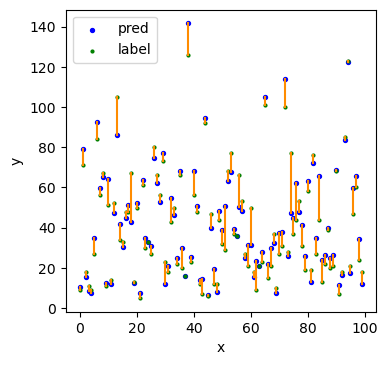

In [27]:
cuantos = 100
ypred = y_pred[:cuantos]
ylabel = list(y_test)[:cuantos]
x = list(range(len(ylabel)))
plt.rcParams["font.size"] = 10
figure, ax = plt.subplots(1,figsize=(4, 4),dpi=100)    
for i in range(len(x)):
    plt.plot([x[i],x[i]],[ypred[i],ylabel[i]],color="darkorange")

plt.scatter(x,ypred, color='blue', label="pred",s=8)
plt.scatter(x,ylabel, color='green', label="label",s=4)


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()